In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain_openai import ChatOpenAI
from typing import TypedDict

In [2]:
load_dotenv(override=True)

True

In [3]:
from langchain_community.tools import DuckDuckGoSearchResults

# Create a DuckDuckGo search tool instance
search = DuckDuckGoSearchResults()

# Make a simple query
result = search.run("What is LangGraph?")
print(result)

snippet: LangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models (LLMs) with graph-based architectures allowing developers to map, organize and optimize how AI agents interact and make decisions., title: What is LangGraph? - GeeksforGeeks, link: https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/, snippet: August 11, 2025 - LangGraph is a tool for solving this challenge. It is a framework on LangChain ecosystem that gives a way to define, coordinate, and execute multiple LLM (Large Language Model) agents in complex workflows ., title: Designveloper What is LangGraph? Key Concepts, Use Cases, and How to Get Started - Designveloper, link: https://www.designveloper.com/blog/what-is-langgraph/, snippet: 2 weeks ago - LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workf

In [4]:
from langchain_core.tools import Tool

# Convert DuckDuckGo search to a LangChain tool
search_tool = Tool(
    name="duckduckgo_search",
    description="Search the web using DuckDuckGo. Use this when you need to find current information about any topic. Answer precisely based on the search results.",
    func=search.run
)

print(f"Tool created: {search_tool.name}")

Tool created: duckduckgo_search


In [5]:
search_tool.invoke("What is the capital of Finland?")

"snippet: 6 days ago - Helsinki (Swedish: Helsingfors) is the capital and most populous city in Finland. It is on the shore of the Gulf of Finland and is the seat of southern Finland's Uusimaa region. About 690,000 people live in the municipality, with 1.3 million in the capital region and 1.6 million in the metropolitan ..., title: Wikipedia Helsinki - Wikipedia, link: https://en.wikipedia.org/wiki/Helsinki, snippet: 5 days ago - Finland, officially the Republic of Finland, is a Nordic country in Northern Europe. It borders Sweden to the northwest, Norway to the north, and Russia to the east, with the Gulf of Bothnia to the west and the Gulf of Finland to the south, opposite Estonia. Finland has a population of 5.6 million, the majority being ethnic Finns. Its capital and largest city is Helsinki ..., title: Wikipedia Finland - Wikipedia, link: https://en.wikipedia.org/wiki/Finland, snippet: September 6, 2025 - Helsinki is the capital of Finland and is its largest city. It was founded

In [6]:
tools = [search_tool]

In [7]:
# Step 1 : Define the state objects
class State(TypedDict):
    """
    State object for the LangGraph agent workflow.
    
    Attributes:
        messages (Annotated[list, add_messages]): A list of messages in the conversation.
            The add_messages annotation enables automatic message aggregation and state updates.
    """
    messages: Annotated[list, add_messages]

In [8]:
# Step 2: Start the graph builder with the state object
graph_builder = StateGraph(State)

In [9]:
llm = ChatOpenAI(model="gpt-5-nano", temperature=0.1)
llm_with_tools = llm.bind_tools(tools)

In [10]:
# Step 3: Create the graph nodes
def chatbot(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot",chatbot)
graph_builder.add_node("tools",ToolNode(tools=tools))

In [11]:
# Step 4: Create the edges
graph_builder.add_conditional_edges("chatbot",tools_condition,"tools")

In [12]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("tools","chatbot")

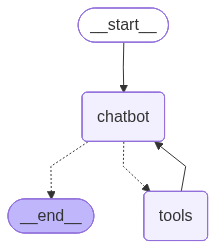

In [13]:
# Step 5: Compile the graph
graph = graph_builder.compile() 
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]})
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
* To create a public link, set `share=True` in `launch()`.


##### Memory

In [15]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [16]:
#step 1 and 2
graph_builder = StateGraph(State)

In [17]:
# Step 3
llm = ChatOpenAI(model="gpt-5-nano", temperature=0.1)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    print(state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))


In [18]:
# Step 4: Create the edges
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

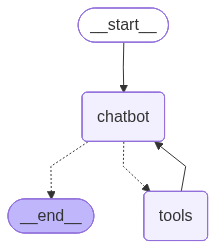

In [19]:
# Step 5 : Compile the graph with memory checkpointer
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "1"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='my name is Shah', additional_kwargs={}, response_metadata={}, id='8bd6ddc7-bf47-46f0-b0a9-4e8c0ff2bdbb')]}
{'messages': [HumanMessage(content='my name is Shah', additional_kwargs={}, response_metadata={}, id='8bd6ddc7-bf47-46f0-b0a9-4e8c0ff2bdbb'), AIMessage(content='Nice to meet you, Shah! How can I help you today? I can tailor responses with your name in this chat if you’d like. What would you like to work on or discuss?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 304, 'prompt_tokens': 160, 'total_tokens': 464, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYS3kgXbVsueFEGcHhoYuahtaPrQs', 'service_tier': 'default', 'finish_reason':

In [21]:
graph.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='my name is Shah', additional_kwargs={}, response_metadata={}, id='8bd6ddc7-bf47-46f0-b0a9-4e8c0ff2bdbb'), AIMessage(content='Nice to meet you, Shah! How can I help you today? I can tailor responses with your name in this chat if you’d like. What would you like to work on or discuss?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 304, 'prompt_tokens': 160, 'total_tokens': 464, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYS3kgXbVsueFEGcHhoYuahtaPrQs', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--1d06c35f-8dee-47e7-9b3e-7576fc774250-0', usage_metadata={'input_tokens': 160, 'out

In [22]:
# Most recent first

list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='my name is Shah', additional_kwargs={}, response_metadata={}, id='8bd6ddc7-bf47-46f0-b0a9-4e8c0ff2bdbb'), AIMessage(content='Nice to meet you, Shah! How can I help you today? I can tailor responses with your name in this chat if you’d like. What would you like to work on or discuss?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 304, 'prompt_tokens': 160, 'total_tokens': 464, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYS3kgXbVsueFEGcHhoYuahtaPrQs', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--1d06c35f-8dee-47e7-9b3e-7576fc774250-0', usage_metadata={'input_tokens': 160, 'ou